In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [14]:
df = pd.read_csv(r"C:\Users\ABC\Documents\FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
# summarize the data
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
df.corr(method='pearson')

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

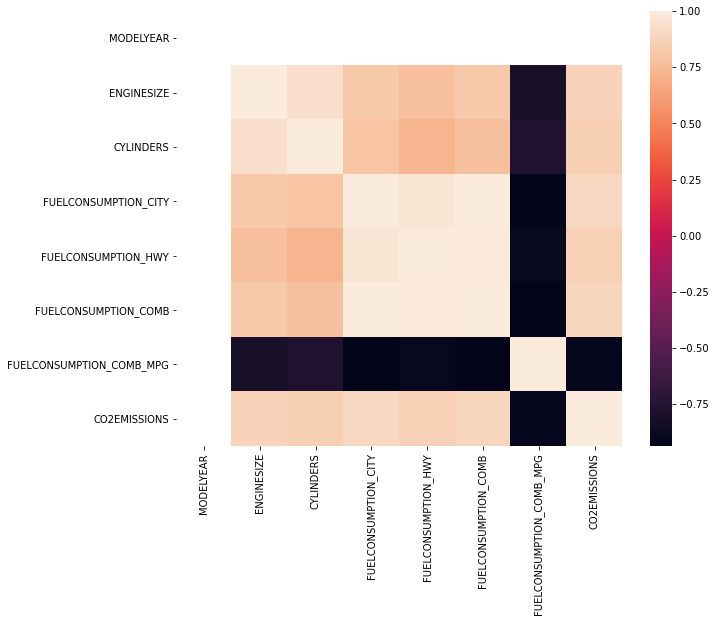

In [17]:
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr())

In [18]:
X = df[['ENGINESIZE']]
X

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [19]:
y = df[['CO2EMISSIONS']]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  

In [22]:
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
#To retrieve the intercept:
regressor.intercept_

array([127.63656735])

In [25]:
#For retrieving the slope:
print(regressor.coef_)

[[38.38333382]]


In [26]:
y_pred = regressor.predict(X_test)
y_pred

array([[265.81656911],
       [265.81656911],
       [166.01990117],
       [281.16990264],
       [357.93657029],
       [261.97823573],
       [296.52323617],
       [219.75656852],
       [181.3732347 ],
       [219.75656852],
       [261.97823573],
       [327.22990323],
       [380.96657059],
       [204.40323499],
       [338.74490338],
       [223.59490191],
       [204.40323499],
       [365.61323706],
       [204.40323499],
       [331.06823661],
       [223.59490191],
       [261.97823573],
       [357.93657029],
       [265.81656911],
       [265.81656911],
       [331.06823661],
       [265.81656911],
       [219.75656852],
       [242.78656882],
       [269.6549025 ],
       [265.81656911],
       [261.97823573],
       [261.97823573],
       [196.72656823],
       [304.19990294],
       [196.72656823],
       [261.97823573],
       [261.97823573],
       [350.25990353],
       [384.80490397],
       [369.45157044],
       [196.72656823],
       [204.40323499],
       [196

Text(0, 0.5, 'Emission')

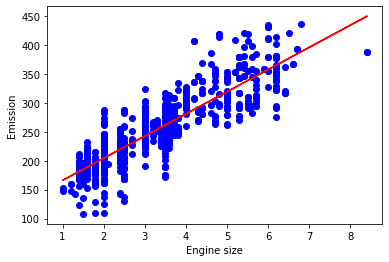

In [27]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_[0][0]*X_train + regressor.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.557259514352364
MSE: 522.1705884607358
RMSE: 22.851052239683312
